Importing the Libraries.
Fetching the mushroom dataset from the UCI Machine Learning Repository.

In [80]:
# Importing libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression




In [81]:
# fetch dataset from UCI Machine Learning Repository
mushroom = fetch_ucirepo(id=73) 

# data as pandas dataframes
mushroom_df = pd.DataFrame.from_dict(mushroom.data.original)

not sure if this helps but i dropped the rows with null elements 

In [82]:

# number of rows before 
elements = mushroom_df.shape[0]
print(f"Number of elements before: {elements}")

# checking for NULL elements
null_elements = mushroom_df.isnull().sum().sum()
print(f"Number of null elements before: {null_elements}")

# removing rows with null elements
mushroom_df = mushroom_df.dropna()

# number of rows after
elements = mushroom_df.shape[0]
print(f"Number of elements remaining: {elements}")

# check for null elements after removing
null_elements = mushroom_df.isnull().sum().sum()
print(f"Number of null elements after: {null_elements}")

print(mushroom_df.head())


Number of elements before: 8124
Number of null elements before: 2480
Number of elements remaining: 5644
Number of null elements after: 0
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                   

Got to look at the dataset and figuring out the features which are significant to determine if a mushroom is poisonous

In [59]:
# get unique values for each column of data in the X dataframe

for col in mushroom_df.columns:
    print(col, mushroom_df[col].unique())


cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'c']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'r' 'y']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'c' 'y']
veil-type ['p']
veil-color ['w' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'r' 'w']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'l']
poisonous ['p' 'e']


With a bit of searching i found that "Amanita" Mushrooms are mostly poisonous and has some features that are significant to determine it. 

1. color
2. cap shape
3. Bruises
4. cap texture
5. cap surface
6. Stalk Root
7. Stalk ring
8. Gill
9. Gill color
10. Spore color
11. Odor ( most edible mushrooms have musky earthy smell while poisonous ones have bad odor)

so the rest can be discarded 


In [83]:
# keeping a Copy of the whole data frame
mush_df = mushroom_df

In [88]:
mushroom_df = mushroom_df.drop(
    [
        "gill-attachment",
        "gill-spacing",
        "stalk-surface-above-ring",
        "stalk-surface-below-ring",
        "stalk-color-above-ring",
        "stalk-color-below-ring",
        "veil-type",
        "population",
        "habitat",
        "cap-shape",
        "cap-surface",
        "odor",
        "gill-size",
        "ring-type"
    ], axis=1
)

print(mushroom_df.head())

  cap-color bruises gill-color stalk-shape stalk-root veil-color ring-number  \
0         n       t          k           e          e          w           o   
1         y       t          k           e          c          w           o   
2         w       t          n           e          c          w           o   
3         w       t          n           e          e          w           o   
4         g       f          k           t          e          w           o   

  spore-print-color poisonous  
0                 k         p  
1                 n         e  
2                 n         e  
3                 k         p  
4                 n         e  


converted the columns to category and boolean

In [89]:
categories = [
    "cap-color",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "veil-color",
    "ring-number",
    "spore-print-color"  
    ]

mushroom_df[categories] = mushroom_df[categories].astype("category")


# map column bruises t as True and f as False boolean value
mushroom_df["bruises"] = mushroom_df["bruises"].map({"t": True, "f": False})

# map column poisonous  p as True and e as False boolean value
mushroom_df["poisonous"] = mushroom_df["poisonous"].map({"p": True, "e": False})


# print(mushroom_df.dtypes)
print(mushroom_df.head())

  cap-color  bruises gill-color stalk-shape stalk-root veil-color ring-number  \
0         n     True          k           e          e          w           o   
1         y     True          k           e          c          w           o   
2         w     True          n           e          c          w           o   
3         w     True          n           e          e          w           o   
4         g    False          k           t          e          w           o   

  spore-print-color  poisonous  
0                 k       True  
1                 n      False  
2                 n      False  
3                 k       True  
4                 n      False  


In [90]:
# get dummies for categorical data, Converting them to OHE
mushroom_df = pd.get_dummies(mushroom_df)

# print the first few lines of the dataframe
print(mushroom_df.head())

   bruises  poisonous  cap-color_b  cap-color_c  cap-color_e  cap-color_g  \
0     True       True            0            0            0            0   
1     True      False            0            0            0            0   
2     True      False            0            0            0            0   
3     True       True            0            0            0            0   
4    False      False            0            0            0            1   

   cap-color_n  cap-color_p  cap-color_w  cap-color_y  ...  veil-color_y  \
0            1            0            0            0  ...             0   
1            0            0            0            1  ...             0   
2            0            0            1            0  ...             0   
3            0            0            1            0  ...             0   
4            0            0            0            0  ...             0   

   ring-number_n  ring-number_o  ring-number_t  spore-print-color_h  \
0        

Seperated the Features form the Targets from the dataset

In [91]:
# creating X and y dataframes
X =  mushroom_df.drop("poisonous", axis=1)
y =  mushroom_df["poisonous"]


In [92]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,random_state= 42)


In [93]:
# create the model
svm_model = svm.SVC()

# train the model
svm_model.fit(X_train, y_train)

# make predictions on both train and test sets
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Calculate accuracy of both train and test sets
acc_train_svm = accuracy_score(y_train, y_pred_train_svm)
acc_test_svm = accuracy_score(y_test, y_pred_test_svm)

# calculate log loss 
loss_svm_test = log_loss(y_train, y_pred_train_svm )
loss_svm_train = log_loss(y_test, y_pred_test_svm)

# printing the accuracies and losses for the model
print(f"Accuracy on train set: {acc_train_svm}")
print(f"Accuracy on test set: {acc_test_svm}")
print(f"Log loss on train set: {loss_svm_train}")
print(f"Log loss on test set: {loss_svm_test}")

Accuracy on train set: 1.0
Accuracy on test set: 1.0
Log loss on train set: 2.220446049250313e-16
Log loss on test set: 2.220446049250313e-16


In [94]:

# create a linear regression model
lr_model = LogisticRegression()
# train the model
lr_model.fit(X_train, y_train)

# make predictions on both train and test sets
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Calculate accuracy of test and train
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate log loss of test and train
log_loss_train = log_loss(y_train, y_pred_train)
log_loss_test = log_loss(y_test, y_pred_test)

# print the train and test accuracy and log loss of the model
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")
print(f"Train Log Loss: {log_loss_train}")
print(f"Test Log Loss: {log_loss_test}")


Train Accuracy: 0.9993355481727575
Test Accuracy: 0.9991142604074402
Train Log Loss: 0.023949271354895336
Test Log Loss: 0.03192529086724304


In [95]:
lr_model_new = LogisticRegression()

scores = model_selection.cross_val_score(lr_model_new, X_train, y_train, cv=5)

# print the mean cross-validation score
print(f"Cross-validation accuracy: {scores.mean()}")

Cross-validation accuracy: 0.996234772978959


The Accuracy and loss is too perfect , probably an indication that the models are overfit , i split the sets into 3 parts, 

60% of the data for training,

20% for cross-validation, 

and 20% for testing

In [96]:
X_temp, X_test_, y_temp, y_test_ =model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train_, X_cv, y_train_, y_cv = model_selection.train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [97]:
# define the model
lr_model_ = LogisticRegression()

# define the grid of hyperparameters to search
hyperparameters = {'C': np.logspace(-5, 5, 1000)}

# define the grid search
grid_search = model_selection.GridSearchCV(lr_model_, hyperparameters, cv=5, verbose=0)

# fit the model and search the hyperparameters
grid_search.fit(X_train_, y_train_)

# print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# make predictions on train, test and cross-validation sets using the best model
y_pred_train_ = grid_search.predict(X_train_)
y_pred_test_ = grid_search.predict(X_test_)
y_pred_cv = grid_search.predict(X_cv)

# Calculate accuracy of train, test and cross-validation
accuracy_train_ = accuracy_score(y_train_, y_pred_train_)
accuracy_test_ = accuracy_score(y_test_, y_pred_test_)
accuracy_cv = accuracy_score(y_cv, y_pred_cv)

# Calculate log loss of train, test and cross-validation
log_loss_train_ = log_loss(y_train_, y_pred_train_)
log_loss_test_ = log_loss(y_test_, y_pred_test_)
log_loss_cv = log_loss(y_cv, y_pred_cv)

# print the train, test and cross-validation accuracy and log loss of the model
print(f"Train Accuracy: {accuracy_train_}")
print(f"Test Accuracy: {accuracy_test_}")
print(f"Cross-Validation Accuracy: {accuracy_cv}")
print(f"Train Log Loss: {log_loss_train_}")
print(f"Test Log Loss: {log_loss_test_}")
print(f"Cross-Validation Log Loss: {log_loss_cv}")

C:\Users\ADMRo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMRo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best Hyperparameters: {'C': 12.476595526308685}
Train Accuracy: 1.0
Test Accuracy: 1.0
Cross-Validation Accuracy: 1.0
Train Log Loss: 2.220446049250313e-16
Test Log Loss: 2.220446049250313e-16
Cross-Validation Log Loss: 2.220446049250313e-16


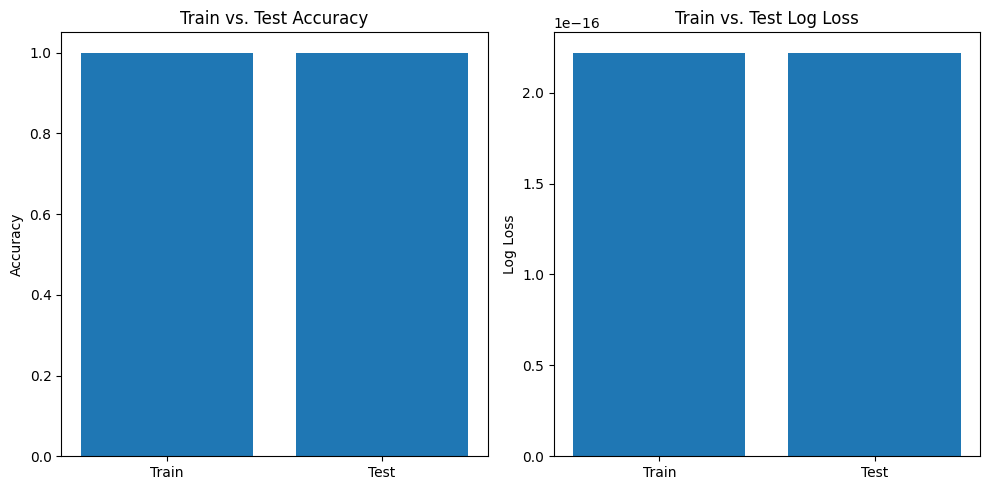

In [98]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [accuracy_train_, accuracy_test_])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [log_loss_train_, log_loss_test_])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier

# define the model
dt_model = DecisionTreeClassifier()

# define the grid of hyperparameters to search
hyperparameters_dt = {'max_depth': range(1, 21), 'min_samples_split': range(2, 21)}

# define the grid search
grid_search_dt = model_selection.GridSearchCV(dt_model, hyperparameters_dt, cv=5, verbose=0)

# fit the model and search the hyperparameters
grid_search_dt.fit(X_train_, y_train_)

# print the best hyperparameters
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")

# make predictions on train, test and cross-validation sets using the best model
y_pred_train_dt = grid_search_dt.predict(X_train_)
y_pred_test_dt = grid_search_dt.predict(X_test_)
y_pred_cv_dt = grid_search_dt.predict(X_cv)

# Calculate accuracy of train, test and cross-validation
accuracy_train_dt = accuracy_score(y_train_, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test_, y_pred_test_dt)
accuracy_cv_dt = accuracy_score(y_cv, y_pred_cv_dt)

# Calculate log loss of train, test and cross-validation
log_loss_train_dt = log_loss(y_train_, y_pred_train_dt)
log_loss_test_dt = log_loss(y_test_, y_pred_test_dt)
log_loss_cv_dt = log_loss(y_cv, y_pred_cv_dt)

# print the train, test and cross-validation accuracy and log loss of the model
print(f"Train Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")
print(f"Cross-Validation Accuracy: {accuracy_cv_dt}")
print(f"Train Log Loss: {log_loss_train_dt}")
print(f"Test Log Loss: {log_loss_test_dt}")
print(f"Cross-Validation Log Loss: {log_loss_cv_dt}")

Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 2}
Train Accuracy: 1.0
Test Accuracy: 1.0
Cross-Validation Accuracy: 1.0
Train Log Loss: 2.220446049250313e-16
Test Log Loss: 2.220446049250313e-16
Cross-Validation Log Loss: 2.220446049250313e-16


I have accepted that either the models are very good or it is overfit. 

In [100]:
# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4}
# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(X_train_, y_train_)
model_2.fit(X_train_, y_train_)
model_3.fit(X_train_, y_train_)
model_4.fit(X_train_, y_train_)
model_5.fit(X_train_, y_train_)
# Prediction sets
preds_1 = model_1.predict(X_test_)
preds_2 = model_3.predict(X_test_)
preds_3 = model_3.predict(X_test_)
preds_4 = model_4.predict(X_test_)
preds_5 = model_5.predict(X_test_)
print(f'Accuracy on Model 1: {round(accuracy_score(y_test_, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test_, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(y_test_, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(y_test_, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(y_test_, preds_5), 3)}')

Accuracy on Model 1: 0.978
Accuracy on Model 2: 0.979
Accuracy on Model 3: 0.979
Accuracy on Model 4: 1.0
Accuracy on Model 5: 0.959


Welp

Bit of Code from kaggle to calculate the percentage of poisonous and edible mushrooms. 

In [101]:
# Calculate the number of edible mushrooms and poisonous musrooms, percentage of poisonous and edible mushrooms
n_edible= np.sum(y==True)
n_poisonous= np.sum(y==False)
total= n_edible + n_poisonous
print("No. of poisonous mushrooms is",n_poisonous)
print("No. of edible mushrooms is",n_edible)
print("% of posionous mushrooms is",(n_poisonous/total)*100)
print("% of edible mushrooms is",(n_edible/total)*100)

No. of poisonous mushrooms is 3488
No. of edible mushrooms is 2156
% of posionous mushrooms is 61.80014174344437
% of edible mushrooms is 38.199858256555636
